# **Data Collection and Preparation - Charging Sessions**

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [64]:
try:
    df = pd.read_csv('resources/csv_files/charging_sessions.csv')
    print("Successfully imported charging_sessions.csv")
except FileNotFoundError:
    print("Error: charging_sessions.csv not found.")

Successfully imported charging_sessions.csv


In [65]:
df

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."


### Format
We first observe that the .csv file's first column is an unnamed column with integers. Since there is no description in the .pdf file for the team assignment, we will drop these incoherent values and get rid of the very first column.

In [66]:
df = df.drop(df.columns[0], axis=1)

Furthermore, if we take a look at the ***userInputs*** column, we see that the provided data is in *json*-format.
For easier handling, we want to transform this column to an appropriate format for our analysis.
We will thus create a new column for each field in the json.

In [67]:
def parse_json(value):
    if isinstance(value, str):
        json_value = value.replace("'", '"')
        json_value = json_value.replace("True", "true").replace("False", "false")

        try:
            return json.loads(json_value)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
            return None
    return None


df['parsedJson'] = df['userInputs'].apply(parse_json)


all_keys = set()
for row in df['parsedJson'].dropna():
    if isinstance(row, list) and row:
        all_keys.update(row[0].keys())

for field in all_keys:
    df[field] = df['parsedJson'].apply(
        lambda x: x[0].get(field) if isinstance(x, list) and x else np.nan
    )

df = df.drop(columns=['userInputs', 'parsedJson'])
df

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,minutesAvailable,milesRequested,modifiedAt,paymentRequired,kWhRequested,requestedDeparture,WhPerMile
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,463.0,100.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,25.00,"Thu, 02 Jan 2020 20:51:54 GMT",250.0
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,595.0,250.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,70.00,"Thu, 02 Jan 2020 23:31:50 GMT",280.0
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,60.0,20.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,8.00,"Thu, 02 Jan 2020 14:56:35 GMT",400.0
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,65.0,20.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,8.00,"Thu, 02 Jan 2020 15:04:58 GMT",400.0
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,504.0,40.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,16.00,"Thu, 02 Jan 2020 22:24:01 GMT",400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,355.0,130.0,"Wed, 31 Jul 2019 18:08:23 GMT",True,31.20,"Thu, 01 Aug 2019 00:03:04 GMT",240.0
66446,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,455.0,20.0,"Wed, 31 Jul 2019 18:41:02 GMT",True,6.66,"Thu, 01 Aug 2019 02:15:41 GMT",333.0
66447,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,184.0,60.0,"Wed, 31 Jul 2019 19:04:57 GMT",True,19.98,"Wed, 31 Jul 2019 22:08:40 GMT",333.0
66448,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,60.0,80.0,"Wed, 31 Jul 2019 19:20:10 GMT",True,22.00,"Wed, 31 Jul 2019 20:19:47 GMT",275.0


Now we take a look at the datatypes in our dataframe:

In [68]:
df.dtypes

id                     object
connectionTime         object
disconnectTime         object
doneChargingTime       object
kWhDelivered          float64
sessionID              object
siteID                  int64
spaceID                object
stationID              object
timezone               object
userID                float64
minutesAvailable      float64
milesRequested        float64
modifiedAt             object
paymentRequired        object
kWhRequested          float64
requestedDeparture     object
WhPerMile             float64
dtype: object

For easier handling during our analysis, it might be benificial to convert the values of **connectionTime**, **disconnectTime**, **doneChargingtime**, **modifiedAt** and **requestedDeparture** from type object to datetime. Further, we know by the supplemented document of the team assignment that all datetimes are in UTC. For easier use, we will convert all datetimes from Timezone *UTC* to *America/Los Angeles*.

In [69]:
df['connectionTime'] = pd.to_datetime(df['connectionTime'], utc=True, errors='coerce').dt.tz_convert('America/Los_Angeles')
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], utc=True, errors='coerce').dt.tz_convert('America/Los_Angeles')
df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], utc=True, errors='coerce').dt.tz_convert('America/Los_Angeles')
df['modifiedAt'] = pd.to_datetime(df['modifiedAt'], utc=True, errors='coerce').dt.tz_convert('America/Los_Angeles')
df['requestedDeparture'] = pd.to_datetime(df['requestedDeparture'], utc=True, errors='coerce').dt.tz_convert('America/Los_Angeles')
df.dtypes

id                                                 object
connectionTime        datetime64[ns, America/Los_Angeles]
disconnectTime        datetime64[ns, America/Los_Angeles]
doneChargingTime      datetime64[ns, America/Los_Angeles]
kWhDelivered                                      float64
sessionID                                          object
siteID                                              int64
spaceID                                            object
stationID                                          object
timezone                                           object
userID                                            float64
minutesAvailable                                  float64
milesRequested                                    float64
modifiedAt            datetime64[ns, America/Los_Angeles]
paymentRequired                                    object
kWhRequested                                      float64
requestedDeparture    datetime64[ns, America/Los_Angeles]
WhPerMile     

In [70]:
df.head(3)

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,minutesAvailable,milesRequested,modifiedAt,paymentRequired,kWhRequested,requestedDeparture,WhPerMile
0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,463.0,100.0,2020-01-02 05:09:39-08:00,True,25.0,2020-01-02 12:51:54-08:00,250.0
1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,595.0,250.0,2020-01-02 05:37:11-08:00,True,70.0,2020-01-02 15:31:50-08:00,280.0
2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,60.0,20.0,2020-01-02 05:57:17-08:00,True,8.0,2020-01-02 06:56:35-08:00,400.0


In [71]:
df.describe(include='all')

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,minutesAvailable,milesRequested,modifiedAt,paymentRequired,kWhRequested,requestedDeparture,WhPerMile
count,66450,66450,66450,62362,66450.000000,66450,66450.000000,66450,66450,66450,49187.000000,49187.000000,49187.000000,49187,49187,49187.000000,49187,49187.000000
unique,65037,NaN,NaN,NaN,NaN,65037,NaN,107,107,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
top,5d3b9b4ff9af8b7392318319,NaN,NaN,NaN,NaN,1_1_193_816_2019-07-10 13:29:21.499835,NaN,CA-303,2-39-139-28,America/Los_Angeles,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,2,NaN,1805,1805,66450,NaN,NaN,NaN,NaN,49187,NaN,NaN,NaN
mean,NaN,2019-08-06 13:19:01.997832704-07:00,2019-08-06 19:36:36.576042240-07:00,2019-07-25 17:28:10.348946432-07:00,11.787916,NaN,1.472656,NaN,NaN,NaN,1800.494582,358.359587,74.499278,2019-11-10 11:56:27.387256320-08:00,NaN,25.136324,2019-11-10 17:52:45.285603840-08:00,361.444162
min,NaN,2018-04-25 04:08:04-07:00,2018-04-25 06:20:10-07:00,2018-04-25 06:21:10-07:00,0.501000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,2018-04-30 08:08:54-07:00,NaN,0.000000,2018-04-30 17:17:49-07:00,50.000000
25%,NaN,2018-11-13 00:28:56.500000-08:00,2018-11-13 11:00:42-08:00,2018-11-15 02:24:38.249999872-08:00,5.097000,NaN,1.000000,NaN,NaN,NaN,431.000000,193.000000,30.000000,2019-03-28 19:24:31-07:00,NaN,12.000000,2019-03-29 00:16:08.500000-07:00,288.000000
50%,NaN,2019-06-14 07:17:45.500000-07:00,2019-06-14 15:00:46-07:00,2019-06-05 13:53:37-07:00,9.140000,NaN,1.000000,NaN,NaN,NaN,818.000000,360.000000,50.000000,2019-08-26 08:49:18-07:00,NaN,19.000000,2019-08-26 16:34:10-07:00,354.000000
75%,NaN,2020-01-07 16:31:54.500000-08:00,2020-01-07 19:36:08-08:00,2019-12-17 10:40:35.249999872-08:00,14.183000,NaN,2.000000,NaN,NaN,NaN,1805.000000,501.000000,100.000000,2020-02-22 13:44:11-08:00,NaN,32.000000,2020-02-22 21:05:53-08:00,400.000000
max,NaN,2021-09-13 22:43:39-07:00,2021-09-14 07:46:28-07:00,2021-09-14 07:46:22-07:00,108.797242,NaN,2.000000,NaN,NaN,NaN,19923.000000,10062.000000,775.000000,2021-09-13 22:43:38-07:00,NaN,215.320000,2021-09-14 10:15:39-07:00,2000.000000


Let's also take a look at the amount of distinct values for each column.

In [72]:
df.nunique(dropna=True)

id                    65037
connectionTime        64839
disconnectTime        64906
doneChargingTime      60637
kWhDelivered          25629
sessionID             65037
siteID                    2
spaceID                 107
stationID               107
timezone                  1
userID                 1006
minutesAvailable        842
milesRequested          106
modifiedAt            47704
paymentRequired           1
kWhRequested           1201
requestedDeparture    47773
WhPerMile               178
dtype: int64

We observe that for the columns **timezone** and **paymentRequired**, there is only **one** unique value which is not null.
Thus, we can drop them as they don't add any value to our analysis since they can't be used to compare / differentiate rows.

In [73]:
df = df.drop(columns=['timezone','paymentRequired'])

Further, we see that there is the same amount of spaceIDs as stationIDs (both 107). Let's take a look at how many different combinations there are.

In [74]:
df.drop_duplicates(subset=['stationID', 'spaceID']).shape[0]

107

We observe that there are also only 107 possible combinations. This means that there is a 1:1 mapping between stationIDs and spaceIDs. Keeping both is unnecessary as the information would be redundant, thus we will drop the *spaceID*.

In [75]:
df = df.drop(columns='spaceID', axis=1)

We also see that there are 2 siteIDs (which we would also expect). Let's just check in case it could be Null.

In [76]:
len(df[df.siteID.isnull()])

0

Perfect!

### Duplicates
First we want to find out whether any duplicates exist.
If so, those duplicates shall be removed.

In [77]:
len(df[df.duplicated()])

1413

As we can see, there are **1413** duplicated rows. We will thus remove them for further analysis.

In [78]:
df = df.drop_duplicates()

### Missing Data
We now want to check the data for missing values

In [79]:
df.isnull().sum()

id                        0
connectionTime            0
disconnectTime            0
doneChargingTime       4087
kWhDelivered              0
sessionID                 0
siteID                    0
stationID                 0
userID                17215
minutesAvailable      17215
milesRequested        17215
modifiedAt            17215
kWhRequested          17215
requestedDeparture    17215
WhPerMile             17215
dtype: int64

As we can see, there are **4087** rows with a missing **doneChargingTime** value as well as **17215** rows with missing **userID** and **userInputs** value. The latter is expected as charging sessions may also be carried out by unregistered users. Thus, we only have to take care of the **doneChargingTime** values. We will do this with the help of a new variable.

## New features

We will also add some new features which we consider useful for our further analysis

In [80]:
df['dayOfWeek'] = df['connectionTime'].dt.day_name()
df['month'] = df['connectionTime'].dt.month_name()
df['connectionDuration'] = (df['disconnectTime'] - df['connectionTime']).dt.total_seconds() / 3600
df['chargingDuration'] = (df['doneChargingTime'] - df['connectionTime']).dt.total_seconds() / 3600

cols = df.columns.tolist()
df = df[cols[:2] + ['connectionDuration', 'chargingDuration'] + cols[2:-2]]

df

,id,connectionTime,connectionDuration,chargingDuration,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,stationID,userID,minutesAvailable,milesRequested,modifiedAt,kWhRequested,requestedDeparture,WhPerMile,dayOfWeek,month
0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,6.039167,4.378056,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,1-1-179-810,194.0,463.0,100.0,2020-01-02 05:09:39-08:00,25.00,2020-01-02 12:51:54-08:00,250.0,Thursday,January
1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,9.025278,6.687500,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,1-1-193-825,4275.0,595.0,250.0,2020-01-02 05:37:11-08:00,70.00,2020-01-02 15:31:50-08:00,280.0,Thursday,January
2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,10.713056,2.641944,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,1-1-193-829,344.0,60.0,20.0,2020-01-02 05:57:17-08:00,8.00,2020-01-02 06:56:35-08:00,400.0,Thursday,January
3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2.644722,1.313056,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,1-1-193-820,1117.0,65.0,20.0,2020-01-02 06:00:03-08:00,8.00,2020-01-02 07:04:58-08:00,400.0,Thursday,January
4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,8.144167,4.291389,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,1-1-193-819,334.0,504.0,40.0,2020-01-02 06:00:13-08:00,16.00,2020-01-02 14:24:01-08:00,400.0,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65032,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 14:49:12-07:00,3.801667,1.422500,2019-07-01 18:37:18-07:00,2019-07-01 16:14:33-07:00,8.399,1_1_179_798_2019-07-01 21:49:11.873404,1,1-1-179-798,1346.0,36.0,80.0,2019-07-01 14:49:37-07:00,32.00,2019-07-01 15:25:12-07:00,400.0,Monday,July
65033,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 14:58:45-07:00,2.684167,2.693333,2019-07-01 17:39:48-07:00,2019-07-01 17:40:21-07:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,1-1-179-794,364.0,234.0,100.0,2019-07-01 14:59:09-07:00,40.00,2019-07-01 18:52:45-07:00,400.0,Monday,July
65034,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 15:02:21-07:00,2.941389,2.950556,2019-07-01 17:58:50-07:00,2019-07-01 17:59:23-07:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,1-1-191-807,2050.0,309.0,90.0,2019-07-01 15:02:37-07:00,29.97,2019-07-01 20:11:21-07:00,333.0,Monday,July
65035,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 15:23:44-07:00,3.664444,3.672778,2019-07-01 19:03:36-07:00,2019-07-01 19:04:06-07:00,22.815,1_1_179_781_2019-07-01 22:23:32.496137,1,1-1-179-781,1626.0,99.0,170.0,2019-07-01 15:23:43-07:00,34.00,2019-07-01 17:02:44-07:00,200.0,Monday,July


We think holidays will also have an impact on the number of charging sessions, so we add another feature indicating the holidays in the City of Burbank.

| Holiday                 | 2018        | 2019        | 2020        | 2021        |
|-------------------------|------------|------------|------------|------------|
| New Year's Day         | Jan 1      | Jan 1      | Jan 1      | Jan 1      |
| Martin Luther King Jr. Day | Jan 15  | Jan 21     | Jan 20     | Jan 18     |
| Presidents' Day        | Feb 19     | Feb 18     | Feb 17     | Feb 15     |
| Memorial Day          | May 28     | May 27     | May 25     | May 31     |
| Independence Day      | Jul 4      | Jul 4      | Jul 4      | Jul 4      |
| Labor Day            | Sep 3      | Sep 2      | Sep 7      | Sep 6      |
| Veterans Day         | Nov 11     | Nov 11     | Nov 11     | Nov 11     |
| Thanksgiving Day     | Nov 22     | Nov 28     | Nov 26     | Nov 25     |
| Day After Thanksgiving | Nov 23   | Nov 29     | Nov 27     | Nov 26     |
| Christmas Day        | Dec 25     | Dec 25     | Dec 25     | Dec 25     |

In [81]:
holidays = [
    "2018-01-01", "2018-01-15", "2018-02-19", "2018-05-28", "2018-07-04",
    "2018-09-03", "2018-11-11", "2018-11-22", "2018-11-23", "2018-12-25",

    "2019-01-01", "2019-01-21", "2019-02-18", "2019-05-27", "2019-07-04",
    "2019-09-02", "2019-11-11", "2019-11-28", "2019-11-29", "2019-12-25",

    "2020-01-01", "2020-01-20", "2020-02-17", "2020-05-25", "2020-07-04",
    "2020-09-07", "2020-11-11", "2020-11-26", "2020-11-27", "2020-12-25",

    "2021-01-01", "2021-01-18", "2021-02-15", "2021-05-31", "2021-07-04",
    "2021-09-06", "2021-11-11", "2021-11-25", "2021-11-26", "2021-12-25",
]
holidays = [pd.to_datetime(date).date() for date in holidays]

df.loc[:, 'isHoliday'] = df['connectionTime'].dt.date.isin(holidays)
df[df['isHoliday']]

,id,connectionTime,connectionDuration,chargingDuration,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,stationID,userID,minutesAvailable,milesRequested,modifiedAt,kWhRequested,requestedDeparture,WhPerMile,dayOfWeek,month,isHoliday
803,5e3b6c24f9af8b51c8775743,2020-01-20 06:22:57-08:00,3.943056,3.959167,2020-01-20 10:19:32-08:00,2020-01-20 10:20:30-08:00,1.079,1_1_178_823_2020-01-20 14:22:57.242217,1,1-1-178-823,651.0,226.0,50.0,2020-01-20 06:23:40-08:00,20.00,2020-01-20 10:08:57-08:00,400.0,Monday,January,True
804,5e3b6c24f9af8b51c8775744,2020-01-20 06:59:36-08:00,7.576111,2.447500,2020-01-20 14:34:10-08:00,2020-01-20 09:26:27-08:00,14.372,1_1_178_828_2020-01-20 14:59:36.120526,1,1-1-178-828,5065.0,451.0,50.0,2020-01-20 06:59:44-08:00,20.00,2020-01-20 14:30:36-08:00,400.0,Monday,January,True
805,5e3b6c24f9af8b51c8775745,2020-01-20 07:30:45-08:00,8.735000,0.800000,2020-01-20 16:14:51-08:00,2020-01-20 08:18:45-08:00,3.611,1_1_193_819_2020-01-20 15:30:44.618875,1,1-1-193-819,1169.0,60.0,20.0,2020-01-20 07:31:25-08:00,8.00,2020-01-20 08:30:45-08:00,400.0,Monday,January,True
806,5e3b6c24f9af8b51c8775746,2020-01-20 10:20:11-08:00,3.720556,2.159722,2020-01-20 14:03:25-08:00,2020-01-20 12:29:46-08:00,12.340,1_1_193_827_2020-01-20 18:20:11.024409,1,1-1-193-827,651.0,430.0,50.0,2020-01-20 10:20:24-08:00,20.00,2020-01-20 17:30:11-08:00,400.0,Monday,January,True
807,5e3b6c24f9af8b51c8775747,2020-01-20 10:27:03-08:00,1.527222,1.543333,2020-01-20 11:58:41-08:00,2020-01-20 11:59:39-08:00,4.921,1_1_194_821_2020-01-20 18:27:03.368376,1,1-1-194-821,462.0,60.0,20.0,2020-01-20 10:28:04-08:00,8.00,2020-01-20 11:27:03-08:00,400.0,Monday,January,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63290,5d019917f9af8b363129096d,2019-05-27 06:00:16-07:00,6.210833,6.221389,2019-05-27 12:12:55-07:00,2019-05-27 12:13:33-07:00,38.448,1_1_194_822_2019-05-27 13:00:15.809702,1,1-1-194-822,631.0,422.0,150.0,2019-05-27 06:17:31-07:00,60.00,2019-05-27 13:02:16-07:00,400.0,Monday,May,True
63291,5d019917f9af8b363129096e,2019-05-27 12:05:50-07:00,3.827778,3.837222,2019-05-27 15:55:30-07:00,2019-05-27 15:56:04-07:00,20.512,1_1_193_816_2019-05-27 19:05:49.576676,1,1-1-193-816,362.0,328.0,120.0,2019-05-27 12:06:15-07:00,34.32,2019-05-27 17:33:50-07:00,286.0,Monday,May,True
63292,5d019917f9af8b363129096f,2019-05-27 12:13:18-07:00,3.444722,1.779444,2019-05-27 15:39:59-07:00,2019-05-27 14:00:04-07:00,10.250,1_1_178_817_2019-05-27 19:13:17.897139,1,1-1-178-817,413.0,65.0,50.0,2019-05-27 12:14:20-07:00,14.30,2019-05-27 13:18:18-07:00,286.0,Monday,May,True
63293,5d019917f9af8b3631290970,2019-05-27 14:38:36-07:00,5.146944,3.728889,2019-05-27 19:47:25-07:00,2019-05-27 18:22:20-07:00,11.579,1_1_194_821_2019-05-27 21:38:35.582330,1,1-1-194-821,382.0,235.0,50.0,2019-05-27 14:38:57-07:00,20.00,2019-05-27 18:33:36-07:00,400.0,Monday,May,True


Let us take a quick look at the data.

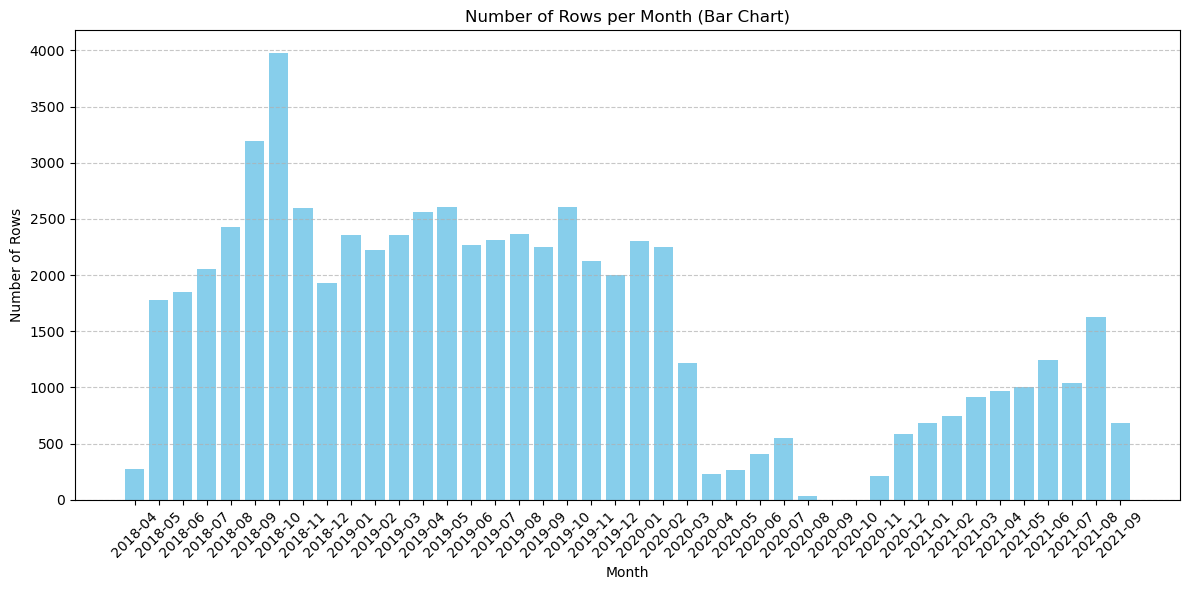

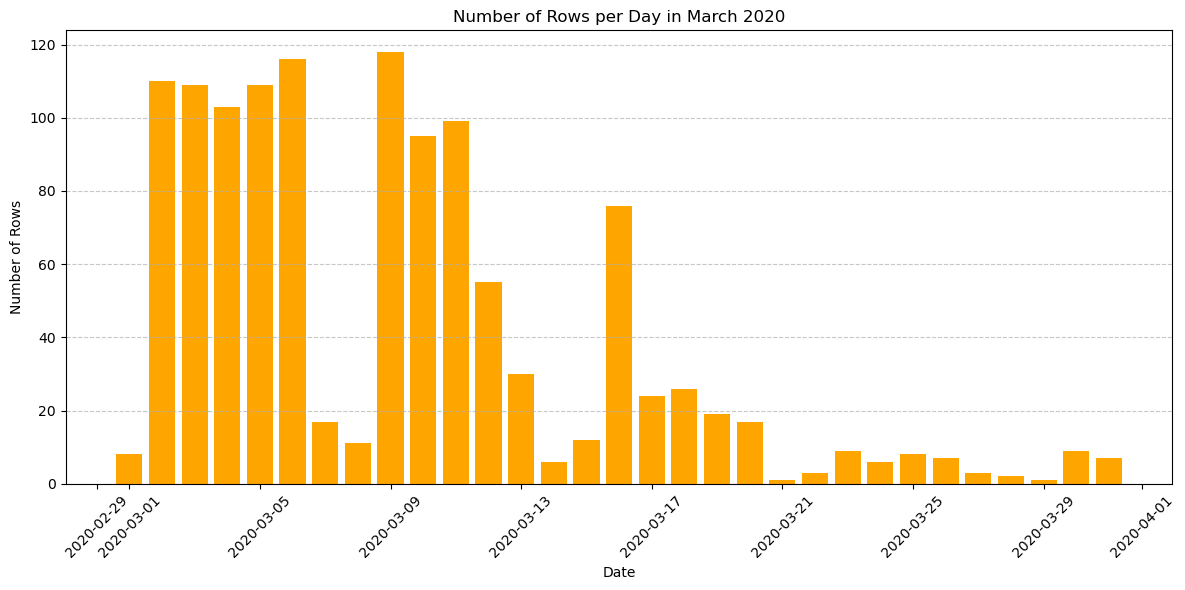

In [82]:
rows_per_month = df.groupby(pd.Grouper(key='connectionTime', freq='ME')).size()
months = rows_per_month.index.strftime('%Y-%m')

plt.figure(figsize=(12, 6))
plt.bar(months, rows_per_month.values, color='skyblue', width=0.8)
plt.title('Number of Rows per Month (Bar Chart)')
plt.xlabel('Month')
plt.ylabel('Number of Rows')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

march_2020 = df[(df['connectionTime'] >= '2020-03-01') & (df['connectionTime'] < '2020-04-01')]
rows_per_day_march = march_2020.groupby(march_2020['connectionTime'].dt.date).size()

plt.figure(figsize=(12, 6))
plt.bar(rows_per_day_march.index, rows_per_day_march.values, color='orange')
plt.title('Number of Rows per Day in March 2020')
plt.xlabel('Date')
plt.ylabel('Number of Rows')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We realize that there is an abrupt change of the number of records starting from the March of 2020. This is probably caused by the start of the Covid pandemic and the resulting distancing rules. To account for this behaviour, we will introduce a new feature *isPandemic* which is false for all records before the 13th March 2020, and true otherwise. This date is taken from the following website: https://www.burbankca.gov/covid-19-emergency-orders ([City of Burbank Local Emergency Order](https://www.burbankca.gov/documents/d/guest/20200327-burbank-local-emergency-order)), the date at which a local emergency was declared in the City of Burbank due to COVID-19 pandemic)

In [83]:
df.loc[:, 'isPandemic'] = df['connectionTime'] >= '2020-03-13'

# Dimensionality Reduction

To reduce the dimensionality of our dataset, we will remove certain variables.

## Domain Knowledge

We will drop columns from which we don't expect to gain any insights from the data for our analysis. For example, we don't expect unique identifiers for the records (*id*, *sessionID*) to be useful. Further, since we don't want to analyze per *user* or *station*, we can also drop the columns *userID* as well as *stationID*. The date *modifiedAt* also seems to be useless. We have also derived the *connectionDuration* and *chargingDuration* from the *disconnectTime* and *doneChargingTime*, so we can drop the latter two since their information would be redundant.

In [84]:
df = df.drop(columns=["id", "sessionID", "stationID", "userID", "modifiedAt", "disconnectTime", "doneChargingTime"])

Let us also observe whether the *requestedDeparture* column is redundant:

In [85]:
print("Records where requestedDeparture deviates more than 1min from connectionTime + minutesAvailable: ",
      len(df[(df['requestedDeparture'].notnull()) & (abs(df['requestedDeparture'] - (df['connectionTime'] + pd.to_timedelta(df['minutesAvailable'], unit='m'))) > pd.Timedelta('1 minute'))]))
print("Records where requestedDeparture deviates less than (or equal to) 1min from connectionTime + minutesAvailable: ",
      len(df[(df['requestedDeparture'].notnull()) & (abs(df['requestedDeparture'] - (df['connectionTime'] + pd.to_timedelta(df['minutesAvailable'], unit='m'))) <= pd.Timedelta('1 minute'))]))

Records where requestedDeparture deviates more than 1min from connectionTime + minutesAvailable:  0
Records where requestedDeparture deviates less than (or equal to) 1min from connectionTime + minutesAvailable:  47822


We see that we can derive the requestedDeparture from the connectionTime and minutesAvailable, so we will drop it as well.

In [86]:
df = df.drop(columns=["requestedDeparture"])

Similarly, we also suspect that we can derive the *milesRequested* by computing kWhRequested * 1000 / WhPerMile.

In [87]:
print("Records where milesRequested deviates more than 1mile from kWhRequested * 1000 / WhPerMile: ",
      len(df[(df['milesRequested'].notnull()) & (abs(df['milesRequested'] - (df['kWhRequested'] * 1000 / df['WhPerMile'])) > 1)]))
print("Records where milesRequested deviates less than (or equal to) 1mile from kWhRequested * 1000 / WhPerMile: ",
      len(df[(df['milesRequested'].notnull()) & (abs(df['milesRequested'] - (df['kWhRequested'] * 1000 / df['WhPerMile'])) <= 1)]))

Records where milesRequested deviates more than 1mile from kWhRequested * 1000 / WhPerMile:  0
Records where milesRequested deviates less than (or equal to) 1mile from kWhRequested * 1000 / WhPerMile:  47822


Again, we can drop this column

In [88]:
df = df.drop(columns=["milesRequested"])

In [89]:
df

,connectionTime,connectionDuration,chargingDuration,kWhDelivered,siteID,minutesAvailable,kWhRequested,WhPerMile,dayOfWeek,month,isHoliday,isPandemic
0,2020-01-02 05:08:54-08:00,6.039167,4.378056,25.016,1,463.0,25.00,250.0,Thursday,January,False,False
1,2020-01-02 05:36:50-08:00,9.025278,6.687500,33.097,1,595.0,70.00,280.0,Thursday,January,False,False
2,2020-01-02 05:56:35-08:00,10.713056,2.641944,6.521,1,60.0,8.00,400.0,Thursday,January,False,False
3,2020-01-02 05:59:58-08:00,2.644722,1.313056,2.355,1,65.0,8.00,400.0,Thursday,January,False,False
4,2020-01-02 06:00:01-08:00,8.144167,4.291389,13.375,1,504.0,16.00,400.0,Thursday,January,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
65032,2019-07-01 14:49:12-07:00,3.801667,1.422500,8.399,1,36.0,32.00,400.0,Monday,July,False,False
65033,2019-07-01 14:58:45-07:00,2.684167,2.693333,16.864,1,234.0,40.00,400.0,Monday,July,False,False
65034,2019-07-01 15:02:21-07:00,2.941389,2.950556,18.335,1,309.0,29.97,333.0,Monday,July,False,False
65035,2019-07-01 15:23:44-07:00,3.664444,3.672778,22.815,1,99.0,34.00,200.0,Monday,July,False,False


## Invalid Data

Now we also want to check for records that are invalid (and don't make any sense).

In [100]:
print(f"Amount of records with negative connectionDuration: {len(df[df['connectionDuration'] <= 0])}")
print(f"Amount of records with negative chargingDuration: {len(df[df['chargingDuration'] <= 0])}")
print(f"Amount of records with negative kWhDelivered: {len(df[df['kWhDelivered'] <= 0])}")
print(f"Amount of records with negative kWhRequested: {len(df[df['WhPerMile'] <= 0])}")
print(f"Amount of records with negative kWhRequested: {len(df[df['kWhRequested'] <= 0])}")

Amount of records with negative connectionDuration: 0
Amount of records with negative chargingDuration: 0
Amount of records with negative kWhDelivered: 0
Amount of records with negative kWhRequested: 0
Amount of records with negative kWhRequested: 0


Since we got so few of them, let's get rid of them:

In [101]:
df = df[((df['chargingDuration'] > 0) | (df['chargingDuration'].isnull())) & ((df['kWhRequested'] > 0) | (df['kWhRequested'].isnull()))]
df

,connectionTime,connectionDuration,chargingDuration,kWhDelivered,siteID,minutesAvailable,kWhRequested,WhPerMile,dayOfWeek,month,isHoliday,isPandemic
0,2020-01-02 05:08:54-08:00,6.039167,4.378056,25.016,1,463.0,25.00,250.0,Thursday,January,False,False
1,2020-01-02 05:36:50-08:00,9.025278,6.687500,33.097,1,595.0,70.00,280.0,Thursday,January,False,False
2,2020-01-02 05:56:35-08:00,10.713056,2.641944,6.521,1,60.0,8.00,400.0,Thursday,January,False,False
3,2020-01-02 05:59:58-08:00,2.644722,1.313056,2.355,1,65.0,8.00,400.0,Thursday,January,False,False
4,2020-01-02 06:00:01-08:00,8.144167,4.291389,13.375,1,504.0,16.00,400.0,Thursday,January,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
65032,2019-07-01 14:49:12-07:00,3.801667,1.422500,8.399,1,36.0,32.00,400.0,Monday,July,False,False
65033,2019-07-01 14:58:45-07:00,2.684167,2.693333,16.864,1,234.0,40.00,400.0,Monday,July,False,False
65034,2019-07-01 15:02:21-07:00,2.941389,2.950556,18.335,1,309.0,29.97,333.0,Monday,July,False,False
65035,2019-07-01 15:23:44-07:00,3.664444,3.672778,22.815,1,99.0,34.00,200.0,Monday,July,False,False


## Missing Data (again)

Remember that the *doneChargingTime* was missing sometimes? Guess what, with the help of the chargingDuration and connectionDuration, we will now impute this value. The thought process behind it is this: We can't really compute the *chargingDuration* by a mean of all values or something as this could lead to a lot of wrong values (chargingDurations might be longer than the connectionDuration). We come up with another approach: We calculate the average ratio of chargingDuration / connectionDuration. Since we always got the connectionDuration, we can impute the chargingDuration by multiplying it with the computed ratio.

In [92]:
connectionDurationSum = df[df['chargingDuration'].notnull()].connectionDuration.sum()
chargingDurationSum = df[df['chargingDuration'].notnull()].chargingDuration.sum()
print(chargingDurationSum / connectionDurationSum)
df.loc[df['chargingDuration'].isnull(), 'chargingDuration'] = df.connectionDuration * (chargingDurationSum / connectionDurationSum)

0.5529452055320567


In [93]:
df.to_csv('resources/csv_files/charging_sessions_prepared.csv', index=False)
df.to_pickle('resources/pickle_files/charging_sessions_prepared.pkl')